In [28]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

In [13]:
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")
# Print the status code of the response.
print(response.status_code)

200


In [14]:
response.json()

{'message': 'success',
 'iss_position': {'longitude': '-84.5900', 'latitude': '5.0828'},
 'timestamp': 1562683985}

In [15]:
# Create a loop to get the ISS info over 10 minutes every 5 seconds
ISS_loc = []
count = 0
while count <= 120:
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
        resp = response.json()
        ISS_loc.append(resp)
        time.sleep(5)
        count = count + 1

In [19]:
# Check the data
ISS_loc

[{'message': 'success',
  'iss_position': {'longitude': '-84.5355', 'latitude': '5.0067'},
  'timestamp': 1562683987},
 {'message': 'success',
  'iss_position': {'longitude': '-84.3538', 'latitude': '4.7529'},
  'timestamp': 1562683992},
 {'message': 'success',
  'iss_position': {'longitude': '-84.1723', 'latitude': '4.4990'},
  'timestamp': 1562683997},
 {'message': 'success',
  'iss_position': {'longitude': '-83.9908', 'latitude': '4.2451'},
  'timestamp': 1562684002},
 {'message': 'success',
  'iss_position': {'longitude': '-83.7915', 'latitude': '3.9658'},
  'timestamp': 1562684007},
 {'message': 'success',
  'iss_position': {'longitude': '-83.6103', 'latitude': '3.7118'},
  'timestamp': 1562684012},
 {'message': 'success',
  'iss_position': {'longitude': '-83.4293', 'latitude': '3.4577'},
  'timestamp': 1562684017},
 {'message': 'success',
  'iss_position': {'longitude': '-83.2304', 'latitude': '3.1783'},
  'timestamp': 1562684023},
 {'message': 'success',
  'iss_position': {'long

In [39]:
ISS_loc[0]['iss_position']['latitude']

'5.0067'

In [ ]:
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
lat_list = []
long_list = []

for i in range(0,len(ISS_loc)):
    ISS_dict[] = ISS_loc[i]['iss_position']['latitude']
pd.DataFrame(d.items(), columns=['Date', 'DateValue'])    

In [20]:
earth = geopandas.read_file("custom.geo.json")
earth.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,ABW.geojson,"POLYGON ((-69.89912109375 12.45200195312499, -..."
1,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,(POLYGON ((-73.02685546874994 21.1923828125000...
2,1,Admin-0 country,5,Barbados,BRB,0,2,Sovereign country,Barbados,BRB,...,Americas,Caribbean,Latin America & Caribbean,8,8,5,3,1,BRB.geojson,"POLYGON ((-59.49331054687499 13.081982421875, ..."
3,1,Admin-0 country,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Americas,Caribbean,Latin America & Caribbean,17,19,6,4,1,ATG.geojson,(POLYGON ((-61.71606445312502 17.0370117187499...
4,3,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Bermuda,BMU,...,Americas,Northern America,North America,7,7,5,4,-99,BMU.geojson,"POLYGON ((-64.73027343749999 32.29345703125, -..."


In [21]:
earth.describe

<bound method NDFrame.describe of      scalerank       featurecla  labelrank                      sovereignt  \
0            3  Admin-0 country          5                     Netherlands   
1            1  Admin-0 country          4                     The Bahamas   
2            1  Admin-0 country          5                        Barbados   
3            1  Admin-0 country          6             Antigua and Barbuda   
4            3  Admin-0 country          6                  United Kingdom   
5            1  Admin-0 country          5                      Costa Rica   
6            1  Admin-0 country          2                          Canada   
7            1  Admin-0 country          6                  United Kingdom   
8            1  Admin-0 country          6                          Belize   
9            1  Admin-0 country          3                            Cuba   
10           3  Admin-0 country          6                          France   
11           1  Admin-0 countr

In [22]:
earth.shape

(232, 65)

In [23]:
type(earth.geometry)

geopandas.geoseries.GeoSeries

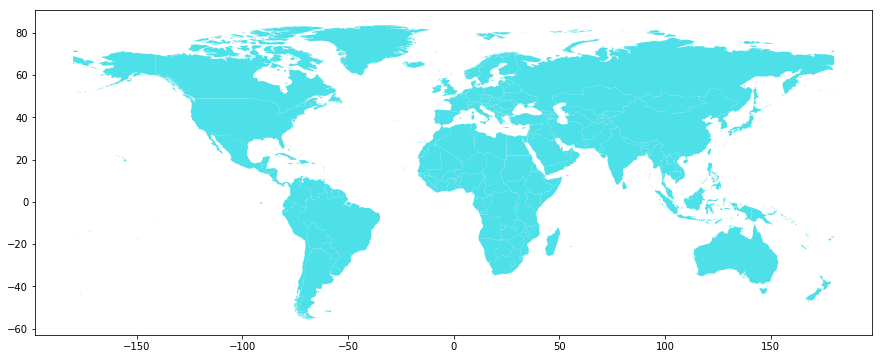

In [25]:
earth.plot(figsize=(15,10), color='#4DE0E8')

In [26]:
ISS_df = pd.DataFrame(ISS_loc)
ISS_df.head()

,iss_position,message,timestamp
0,"{'longitude': '-84.5355', 'latitude': '5.0067'}",success,1562683987
1,"{'longitude': '-84.3538', 'latitude': '4.7529'}",success,1562683992
2,"{'longitude': '-84.1723', 'latitude': '4.4990'}",success,1562683997
3,"{'longitude': '-83.9908', 'latitude': '4.2451'}",success,1562684002
4,"{'longitude': '-83.7915', 'latitude': '3.9658'}",success,1562684007


In [37]:
ISS_df['iss_position'][0]['latitude']

'5.0067'

In [38]:
for index, row in ISS_df.iterrows():
    ISS_df['lat'][row] = ISS_df['iss_position'][row]['latitude']
ISS_df.head()

TypeError: unhashable type: 'dict'